In [ ]:
import pandas as pd
df = pd.read_csv("/content/smoking.csv")

In [ ]:
df.drop(["AST","ALT","Gtp"], inplace=True, axis=1)

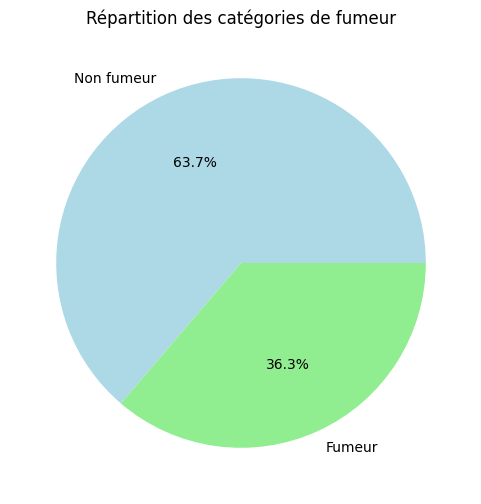

In [ ]:
import matplotlib.pyplot as plt

# Compter le nombre d'observations pour chaque catégorie de fumeur
smoker_counts = df['smoking'].value_counts()

# Créer le plot
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=['Non fumeur', 'Fumeur'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des catégories de fumeur')

# Afficher le plot
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles
categorical_columns = ['gender', 'oral', 'tartar']

# Boucle sur chaque colonne catégorielle
for col in categorical_columns:
    # Initialiser LabelEncoder
    label_encoder = LabelEncoder()

    # Drop les valeurs manquantes et appliquer l'encodage
    col_data = df[col].dropna()
    encoded_data = label_encoder.fit_transform(col_data)

    # Remplacer les valeurs dans le DataFrame original
    df[col] = df[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else None)


In [ ]:
print(df.columns)

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')


In [ ]:
df.isna().sum()

ID                     0
gender                 1
age                    1
height(cm)             1
weight(kg)             1
waist(cm)              1
eyesight(left)         1
eyesight(right)        1
hearing(left)          1
hearing(right)         1
systolic               1
relaxation             1
fasting blood sugar    1
Cholesterol            1
triglyceride           1
HDL                    1
LDL                    1
hemoglobin             1
Urine protein          1
serum creatinine       1
oral                   1
dental caries          1
tartar                 1
smoking                1
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

# Créer un imputeur KNN
imputer = KNNImputer()

# Appliquer l'imputation aux données
imputed_data = imputer.fit_transform(df)

# Créer un nouveau DataFrame avec les données imputées
df = pd.DataFrame(imputed_data, columns=df.columns)

In [ ]:
df.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['smoking'])  # Caractéristiques
y = df['smoking']  # Variable cible

# Appliquer SMOTE pour suréchantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créer un nouveau DataFrame avec les données suréchantillonnées
df= pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(y_resampled, columns=['smoking'])],
                         axis=1)

# Afficher la distribution de la variable cible après suréchantillonnage
target_distribution_resampled = df_resampled['smoking'].value_counts()
print("Distribution de la variable cible 'smoking' après suréchantillonnage :")
print(target_distribution_resampled)

Distribution de la variable cible 'smoking' après suréchantillonnage :
smoking
0.0    11811
1.0    11811
Name: count, dtype: int64


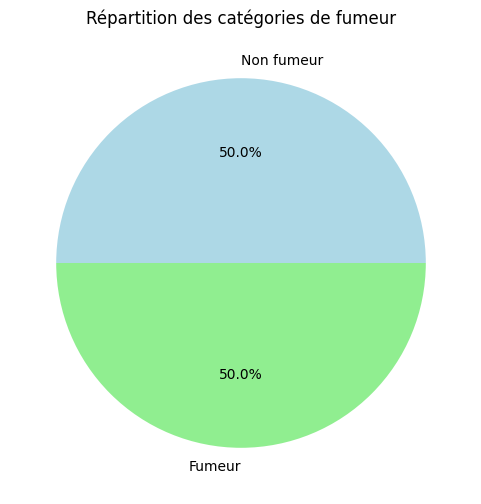

In [ ]:
import matplotlib.pyplot as plt

# Compter le nombre d'observations pour chaque catégorie de fumeur
smoker_counts = df['smoking'].value_counts()

# Créer le plot
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=['Non fumeur', 'Fumeur'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des catégories de fumeur')

# Afficher le plot
plt.show()

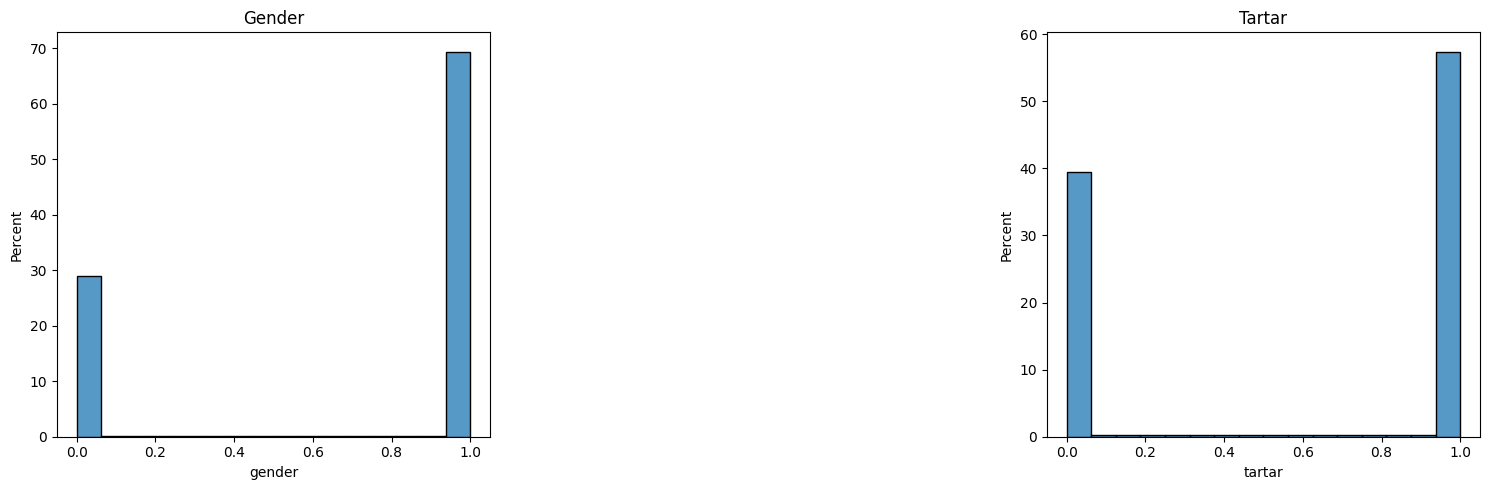

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot des variables catégoriques après la transformation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='gender', stat='percent')
plt.title('Gender')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='tartar', stat='percent')
plt.title('Tartar')

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(23622, 24)

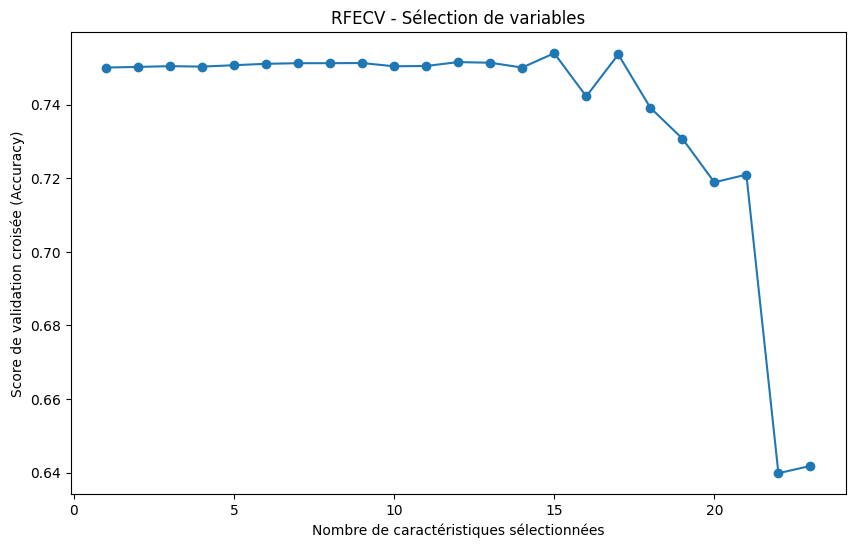

Caractéristiques sélectionnées par RFECV :
gender - Importance : 8 (53.33%)
serum creatinine - Importance : 6 (40.00%)
tartar - Importance : 5 (33.33%)
dental caries - Importance : 4 (26.67%)
weight(kg) - Importance : 3 (20.00%)
hearing(left) - Importance : 2 (13.33%)
height(cm) - Importance : 1 (6.67%)
eyesight(left) - Importance : 1 (6.67%)
eyesight(right) - Importance : 1 (6.67%)
hearing(right) - Importance : 1 (6.67%)
systolic - Importance : 1 (6.67%)
relaxation - Importance : 1 (6.67%)
HDL - Importance : 1 (6.67%)
hemoglobin - Importance : 1 (6.67%)
Urine protein - Importance : 1 (6.67%)


In [ ]:
import warnings
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Ignorer les avertissements (optionnel)
warnings.filterwarnings('ignore')

# Définition des caractéristiques (X) et de la variable cible (y)
X = df.drop('smoking', axis=1)  # Remplacez 'class' par le nom de votre variable cible
y = df['smoking']                # Assurez-vous que 'class' est le nom de votre variable cible

# Création de l'estimateur (régression logistique)
estimator = LogisticRegression()

# Initialisation de l'objet RFECV avec l'estimateur et les paramètres de validation croisée
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Ajustement de RFECV sur les données
rfecv.fit(X, y)

# Affichage des résultats (optionnel)
plt.figure(figsize=(10, 6))
plt.title('RFECV - Sélection de variables')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score de validation croisée (Accuracy)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='-')
plt.show()

# Obtention des caractéristiques sélectionnées
selected_features = X.columns[rfecv.support_]

# Trie des caractéristiques sélectionnées par ordre d'importance
sorted_features = sorted(zip(selected_features, rfecv.ranking_), key=lambda x: x[1], reverse=True)

# Affichage des caractéristiques sélectionnées avec leur ordre d'importance et pourcentage d'importance
print("Caractéristiques sélectionnées par RFECV :")
for feature, rank in sorted_features:
    importance_percentage = abs(rank / len(selected_features) * 100)
    print(f"{feature} - Importance : {rank} ({importance_percentage:.2f}%)")


In [ ]:
X_selected = X[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression:
Accuracy: 0.7481303795682235
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.57      0.70      3595
         1.0       0.68      0.93      0.78      3492

    accuracy                           0.75      7087
   macro avg       0.79      0.75      0.74      7087
weighted avg       0.79      0.75      0.74      7087


Random Forest:
Accuracy: 0.7718357556088613
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      3595
         1.0       0.74      0.82      0.78      3492

    accuracy                           0.77      7087
   macro avg       0.77      0.77      0.77      7087
weighted avg       0.78      0.77      0.77      7087


Decision Tree:
Accuracy: 0.7234372795258924
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      3595
         1.0       0.72     

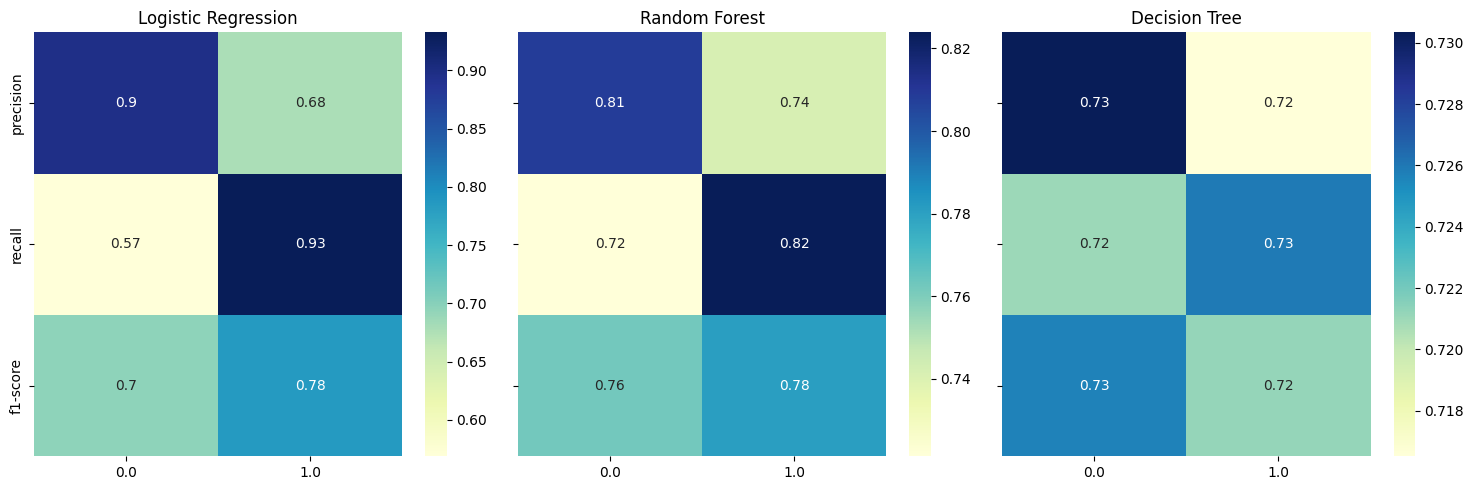

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Reports sous forme de dictionnaire
classification_reports = {
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt, output_dict=True)
}

# Initialisation des figures et des axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Tracé des graphiques pour chaque modèle
for ax, (model, report) in zip(axes, classification_reports.items()):
    df_report = pd.DataFrame(report).iloc[:-1, :2]  # Supprimer la dernière ligne (moyenne) et la dernière colonne (support)
    sns.heatmap(df_report, annot=True, cmap="YlGnBu", ax=ax)  # Tracé du graphique
    ax.set_title(model)  # Titre du graphique

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres pour la régression logistique
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2']  # Type de régularisation
}

# Grille de paramètres pour l'arbre de décision
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis à chaque feuille
}

# Grille de paramètres pour le forêt aléatoire
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis à chaque feuille
    'max_features': ['auto', 'sqrt', 'log2']  # Nombre de caractéristiques à considérer à chaque division
}

# Recherche des meilleurs paramètres pour la régression logistique
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres et meilleur score pour la régression logistique
print("Meilleurs paramètres pour la régression logistique :", lr_grid_search.best_params_)
print("Meilleur score de précision pour la régression logistique :", lr_grid_search.best_score_)

# Recherche des meilleurs paramètres pour l'arbre de décision
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres et meilleur score pour l'arbre de décision
print("Meilleurs paramètres pour l'arbre de décision :", dt_grid_search.best_params_)
print("Meilleur score de précision pour l'arbre de décision :", dt_grid_search.best_score_)

# Recherche des meilleurs paramètres pour la forêt aléatoire
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres et meilleur score pour la forêt aléatoire
print("Meilleurs paramètres pour la forêt aléatoire :", rf_grid_search.best_params_)
print("Meilleur score de précision pour la forêt aléatoire :", rf_grid_search.best_score_)


Meilleurs paramètres pour la régression logistique : {'C': 0.1, 'penalty': 'l2'}
Meilleur score de précision pour la régression logistique : 0.7506077076352167
Meilleurs paramètres pour l'arbre de décision : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score de précision pour l'arbre de décision : 0.7674654076323094
Meilleurs paramètres pour la forêt aléatoire : {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score de précision pour la forêt aléatoire : 0.777689309274756


In [ ]:
# Logistic Regression
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Affichage des performances du modèle de régression logistique
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Affichage des performances du modèle d'arbre de décision
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Affichage des performances du modèle de forêt aléatoire
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.7482714829970368
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70      3595
         1.0       0.68      0.93      0.78      3492

    accuracy                           0.75      7087
   macro avg       0.79      0.75      0.74      7087
weighted avg       0.79      0.75      0.74      7087


Decision Tree:
Accuracy: 0.7646394807393819
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.64      0.73      3595
         1.0       0.71      0.89      0.79      3492

    accuracy                           0.76      7087
   macro avg       0.78      0.77      0.76      7087
weighted avg       0.78      0.76      0.76      7087


Random Forest:
Accuracy: 0.7770565824749541
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.69      0.76      3595
         1.0       0.73     

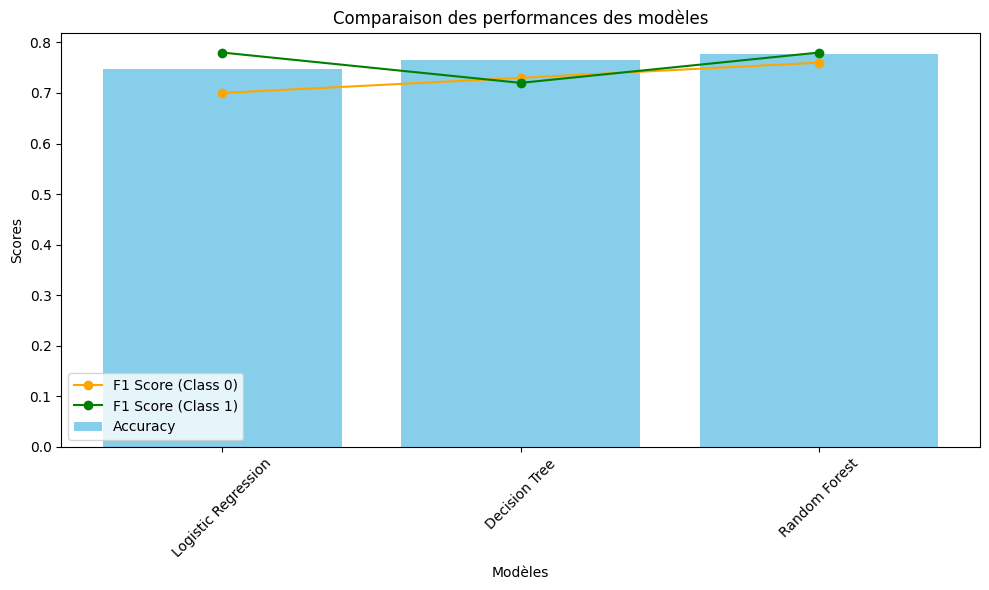

In [ ]:
import matplotlib.pyplot as plt

# Précision des modèles
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

# Scores F1 pour la classe 0 et 1
f1_scores_0 = [0.70, 0.73, 0.76]  # Résultats précédents pour la classe 0
f1_scores_1 = [0.78, 0.72, 0.78]  # Résultats précédents pour la classe 1

# Noms des modèles
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Création du plot
plt.figure(figsize=(10, 6))

plt.bar(models, accuracies, color='skyblue', label='Accuracy')
plt.plot(models, f1_scores_0, marker='o', color='orange', label='F1 Score (Class 0)')
plt.plot(models, f1_scores_1, marker='o', color='green', label='F1 Score (Class 1)')

# Ajout de titres et de légendes
plt.title('Comparaison des performances des modèles')
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.legend()

# Affichage du plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


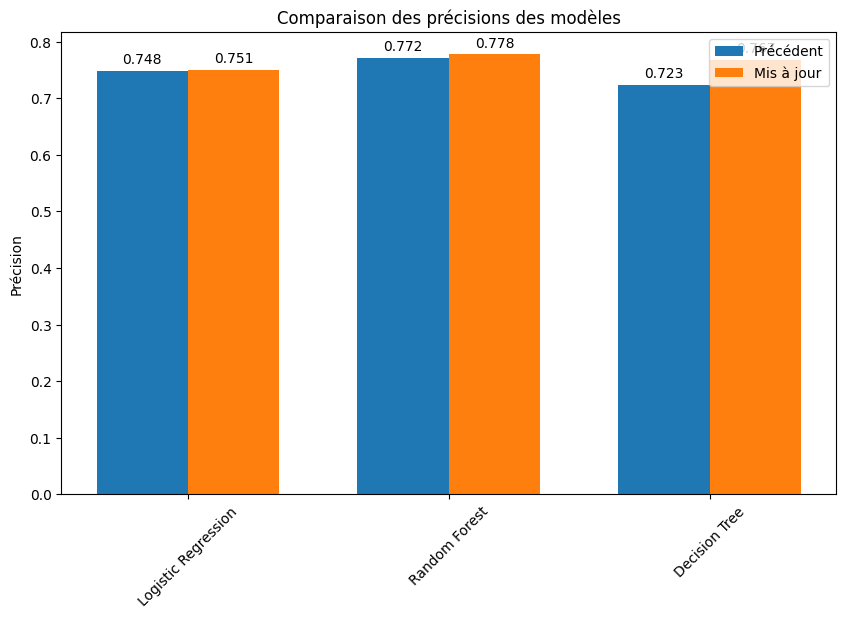

In [ ]:
import numpy as np

# Précision pour chaque modèle
accuracies_prev = [0.7481303795682235,0.7718357556088613, 0.7234372795258924]
accuracies_updated = [0.7506077076352167, 0.777689309274756,  0.7674654076323094]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# Positions des modèles sur l'axe x
x = np.arange(len(models))

# Largeur des barres
width = 0.35

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies_prev, width, label='Précédent')
bars2 = ax.bar(x + width/2, accuracies_updated, width, label='Mis à jour')

# Ajout de textes, étiquettes et de la légende
ax.set_ylabel('Précision')
ax.set_title('Comparaison des précisions des modèles')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Fonction pour ajouter les valeurs sur les barres
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Ajout des valeurs sur les barres
autolabel(bars1)
autolabel(bars2)

plt.show()


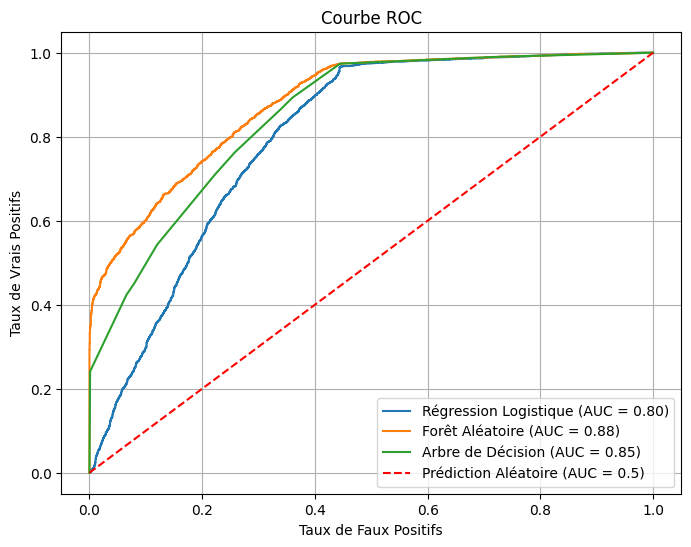

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilités prédites pour la régression logistique
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Probabilités prédites pour la forêt aléatoire
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Probabilités prédites pour l'arbre de décision
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC pour la régression logistique
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Calcul de la courbe ROC pour la forêt aléatoire
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Calcul de la courbe ROC pour l'arbre de décision
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

import matplotlib.pyplot as plt

# Plot de la courbe ROC pour la régression logistique, l'arbre de décision et la forêt aléatoire
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Régression Logistique (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_rf, tpr_rf, label='Forêt Aléatoire (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.plot(fpr_dt, tpr_dt, label='Arbre de Décision (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))

# Plot de la ligne de référence pour la prédiction aléatoire (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Prédiction Aléatoire (AUC = 0.5)')

# Labels et légendes
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid(True)
plt.show()

